In [1]:
# Data Import

from pyriemann.classification import MDM
from pyriemann.estimation import ERPCovariances
from tqdm import tqdm

import sys
sys.path.append('.')
from braininvaders2015b.dataset import BrainInvaders2015b

from scipy.io import loadmat
import numpy as np
import mne

import joblib
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
 
dataset = BrainInvaders2015b(datapath="T:\Kaggle\BCIBachelorThesis\Data")

In [2]:
dataset.pair_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [2]:
scores = {}

largeRaws = []

for pair in dataset.pair_list[:5]:
    scores[pair] = {}

    print('pair', str(pair))
    sessions = dataset._get_single_pair_data(pair=pair)
    for session_name in sessions.keys():

        scores[pair][session_name] = {}

        raw = sessions[session_name]['run_1']
        largeRaws.append(raw)

pair 1
Saving data to  T:\Kaggle\BCIBachelorThesis\Data
pair 2
Saving data to  T:\Kaggle\BCIBachelorThesis\Data
pair 3
Saving data to  T:\Kaggle\BCIBachelorThesis\Data
pair 4
Saving data to  T:\Kaggle\BCIBachelorThesis\Data
pair 5
Saving data to  T:\Kaggle\BCIBachelorThesis\Data


## Data Inspection

In [102]:
import matplotlib.pyplot as plt
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1_1, FP2_1, AFz_1, F7_1, F3_1, F4_1, F8_1, FC5_1, FC1_1, ...
 chs: 64 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 65
 projs: []
 sfreq: 512.0 Hz
>

Before Filtering


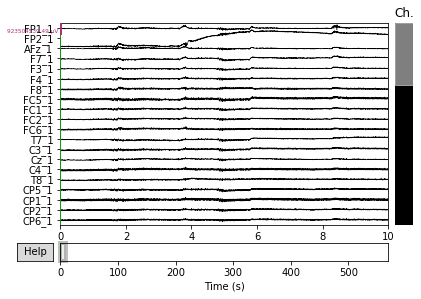

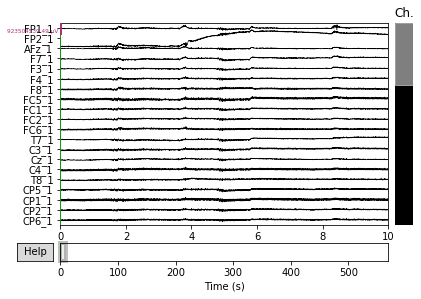

In [90]:
%matplotlib inline
# before filtering

pick_channels = raw.ch_names[:] #+ [raw.ch_names[-1]]   #0:32
raw_subject = raw.copy().pick_channels(pick_channels)

print("Before Filtering")
raw_subject.plot(scalings='auto')

In [3]:
saveMemory = True
if saveMemory:
    del dataset,raw

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge:

- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt

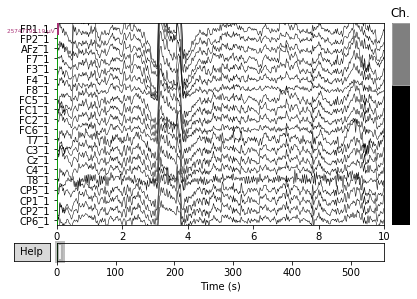

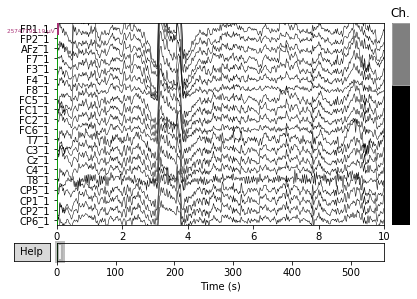

In [4]:
# After filteirng
for raw in largeRaws:
    fmin = 1
    fmax = 20
    raw.filter(fmin, fmax, verbose=True)   
#     raw.plot(scalings='auto')

largeRaws[0].plot(scalings="auto")

In [5]:
allEvents = []
for i,raw in enumerate(largeRaws):
    try:
        events = mne.find_events(raw) #  stim_channel='STI 014'
        allEvents.append(events)
    except ValueError as e:
        print(e)
        print("will skip trial no %d"%i)
# events

834 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 161 163 164 165 181
 182 183 184 185]
834 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 160 162 163 164 165
 180 181 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 160 161 162 163 165
 180 181 182 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 106 107 108 109 110 111 112 160 161 162 163 164 165
 180 181 182 183 184 185]
834 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 161 164 165 180 182
 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 161 162 163 164 165
 180 181 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 107 108 109 110 111 160 162 163 164 180 181 183
 184]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 161 162 163 164 165
 180 181 182 183 184 185]
833 events found
Event IDs: [  1

In [6]:
len(largeRaws),len(allEvents)

(20, 20)

In [7]:
allEpochs = []
from tqdm import tqdm
for raw,events in tqdm(zip(largeRaws,allEvents)):
    event_id = {'NonTarget': 1, 'Target': 2}
    tmin = 0  # start of each epoch (200ms before the trigger)
    tmax = 0.8  # end of each epoch (500ms after the trigger)
#     print(event_id)
    baseline = None  # means from the first instant to t = 0

    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                        baseline=baseline, preload=False)
#     print(epochs)
    allEpochs.append(epochs)

del largeRaws

0it [00:00, ?it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline

14it [00:00, 133.34it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


20it [00:00, 132.45it/s]


In [8]:
len(allEvents),len(allEpochs)

(20, 20)

<Evoked  |  'NonTarget' (average, N=540), [0, 0.80078] sec, 64 ch, ~332 kB>


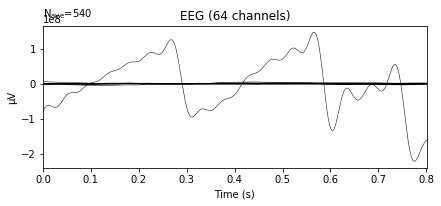

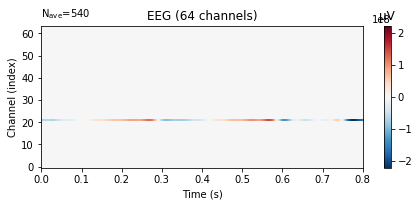

<Evoked  |  'Target' (average, N=120), [0, 0.80078] sec, 64 ch, ~332 kB>


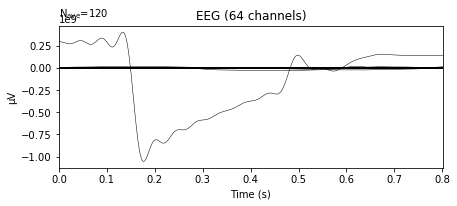

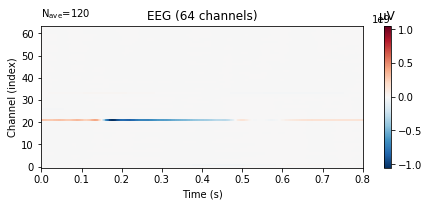

In [22]:
# nontargets = epochs['NonTarget'].get_data()
# targets = epochs['Target'].get_data()

classes = ["NonTarget","Target"]
subepochs = []

for cl in classes:
    evoked =  epochs[cl]
    print(evoked.average())
    subepochs.append(evoked)
    evoked.average().plot(window_title=cl)#scalings="auto"
    evoked.average().plot_image()#scalings="auto"

## Stitch all data together



In [9]:
len(allEpochs)

20

In [11]:
allX = []
ally = []

for epochs in allEpochs:
    X = epochs.get_data()
    y = epochs.events[:,-1]
    y = y - 1  
    allX.append(X)
    ally.append(y)
print(np.shape(allX))
allX = np.concatenate(allX, axis=0)
ally = np.concatenate(ally, axis=0)
np.shape((allX)),np.shape(ally)

del allEpochs

Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 630 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 events and 411 original time points ...
Loading data for 660 eve

# Try different filters

## PCA

Target


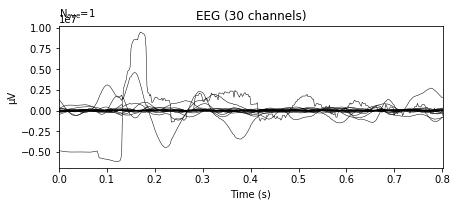

(660, 30, 411)

In [78]:
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA

pca = UnsupervisedSpatialFilter(PCA(30), average=True)
pca_data = pca.fit_transform(epochs.get_data())

ev = mne.EvokedArray(np.mean(pca_data, axis=0),
                     mne.create_info(30, epochs.info['sfreq'],
                                     ch_types='eeg'), tmin=tmin)
print(cl)
ev.plot()

pca_data.shape

## ICA

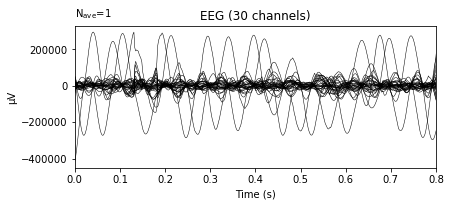

In [82]:
ica = UnsupervisedSpatialFilter(FastICA(30), average=True)
ica_data = ica.fit_transform(epochs.get_data())
ev1 = mne.EvokedArray(np.mean(ica_data, axis=0),
                      mne.create_info(30, epochs.info['sfreq'],
                                      ch_types='eeg'), tmin=tmin)
ev1.plot(show=False, window_title='ICA')

plt.show()

## pyriemann filteirng

In [112]:
# scaling
from mne.decoding import Scaler
# get trials and labels
# X = epochs.get_data()
# y = epochs.events[:,-1]
# y = y - 1  
# print(X.shape,y.shape)
# scaling

scaler = Scaler(scalings="mean")
Xscaled = scaler.fit_transform(allX,ally)

In [12]:
from pyriemann.spatialfilters import *





xdawn = Xdawn()
Xxdawn = xdawn.fit_transform(allX,ally)
Xxdawn.shape


(13170, 8, 411)

In [40]:
epochs.info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1_1, FP2_1, AFz_1, F7_1, F3_1, F4_1, F8_1, FC5_1, FC1_1, ...
 chs: 32 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 512.0 Hz
>

In [42]:
ev = mne.EvokedArray(np.mean(Xxdawn, axis=0),mne.create_info(8, epochs.info['sfreq'],
                                      ch_types='eeg'))



AttributeError: 'EvokedArray' object has no attribute 'get_data'

# trainings

In [10]:
# get trials and labels
X = epochs.get_data()
y = epochs.events[:,-1]
y = y - 1  

y

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [11]:
X.shape

(660, 33, 411)

In [12]:
from pyriemann.estimation import *

cov = Covariances().fit_transform(X)
# cross validation
mdm = MDM(n_jobs=-1)

accuracy = cross_val_score(mdm, cov, y)

print(accuracy.mean())

0.5045454545454546


In [13]:
from pyriemann.tangentspace import TangentSpace
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# build your pipeline
covest = Covariances()
ts = TangentSpace()
svc = SVC(kernel='linear')

clf = make_pipeline(covest,ts,svc)
# cross validation
accuracy = cross_val_score(clf, X, y)

print(accuracy.mean())


0.6484848484848484


In [14]:
 # cross validation
skf = StratifiedKFold(n_splits=2)

clf1 = make_pipeline(ERPCovariances(estimator='lwf', classes=[1]), MDM(n_jobs=-1))
#clf2 = make_pipeline(ERPCovariances(estimator='lwf', classes=[1]))


classfiers = [clf1]

for clf in classfiers:
    scr = cross_val_score(clf, X, y, cv=skf, scoring = 'accuracy').mean()
    print(scr)

0.753030303030303


### LSTM

In [13]:
# data prep
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# first scaling


x_train, x_test, y_train, y_test = train_test_split(Xxdawn, ally, test_size=0.33, random_state=42,shuffle=True)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

model = Sequential()
model.add(LSTM(units = 50, return_sequences = False, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                92400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 92,453
Trainable params: 92,453
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
redlr = ReduceLROnPlateau(monitor='val_accuracy',patience=200)
es = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=500)

model.fit(x_train,y_train,batch_size=64, validation_data=(x_test,y_test),epochs=1000,callbacks=[es,redlr])

#val_acc pure X = 0.8257
# xdawn = 0.8486
# xscaled = 0.8165
# xscaled & xdawn = 0.8165
# pcadata = 0,8165
# icadata = 0,8211

# all channels xdawn - 0,8670

Train on 8823 samples, validate on 4347 samples
Epoch 1/1000
8823/8823 [==============================] - 2s 216us/sample - loss: 0.4362 - accuracy: 0.8187 - val_loss: 0.3840 - val_accuracy: 0.8454
Epoch 2/1000
8823/8823 [==============================] - 1s 101us/sample - loss: 0.3480 - accuracy: 0.8554 - val_loss: 0.3584 - val_accuracy: 0.8482
Epoch 3/1000
8823/8823 [==============================] - 1s 108us/sample - loss: 0.3072 - accuracy: 0.8726 - val_loss: 0.3550 - val_accuracy: 0.8606
Epoch 4/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.2749 - accuracy: 0.8872 - val_loss: 0.3566 - val_accuracy: 0.8565
Epoch 5/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.2529 - accuracy: 0.8983 - val_loss: 0.3612 - val_accuracy: 0.8560
Epoch 6/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.2270 - accuracy: 0.9064 - val_loss: 0.3719 - val_accuracy: 0.8574
Epoch 7/1000
8823/8823 [==============================

8823/8823 [==============================] - 1s 98us/sample - loss: 0.0429 - accuracy: 0.9842 - val_loss: 0.8631 - val_accuracy: 0.8383
Epoch 110/1000
8823/8823 [==============================] - 1s 99us/sample - loss: 0.0498 - accuracy: 0.9804 - val_loss: 0.8614 - val_accuracy: 0.8433
Epoch 111/1000
8823/8823 [==============================] - 1s 99us/sample - loss: 0.0473 - accuracy: 0.9821 - val_loss: 0.8843 - val_accuracy: 0.8475
Epoch 112/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0487 - accuracy: 0.9824 - val_loss: 0.8609 - val_accuracy: 0.8443
Epoch 113/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0499 - accuracy: 0.9821 - val_loss: 0.8756 - val_accuracy: 0.8484
Epoch 114/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0442 - accuracy: 0.9835 - val_loss: 0.8657 - val_accuracy: 0.8392
Epoch 115/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0467 - accuracy: 0.983

8823/8823 [==============================] - 1s 98us/sample - loss: 0.0151 - accuracy: 0.9941 - val_loss: 0.9385 - val_accuracy: 0.8466
Epoch 218/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.9434 - val_accuracy: 0.8459
Epoch 219/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0139 - accuracy: 0.9960 - val_loss: 0.9457 - val_accuracy: 0.8459
Epoch 220/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0138 - accuracy: 0.9952 - val_loss: 0.9480 - val_accuracy: 0.8461
Epoch 221/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.9504 - val_accuracy: 0.8461
Epoch 222/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.9544 - val_accuracy: 0.8454
Epoch 223/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0124 - accuracy: 0.9963 

8823/8823 [==============================] - 1s 100us/sample - loss: 0.0047 - accuracy: 0.9986 - val_loss: 1.2369 - val_accuracy: 0.8443
Epoch 326/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0034 - accuracy: 0.9985 - val_loss: 1.2420 - val_accuracy: 0.8450
Epoch 327/1000
8823/8823 [==============================] - 1s 98us/sample - loss: 0.0046 - accuracy: 0.9984 - val_loss: 1.2396 - val_accuracy: 0.8456
Epoch 328/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0040 - accuracy: 0.9988 - val_loss: 1.2474 - val_accuracy: 0.8454
Epoch 329/1000
8823/8823 [==============================] - 1s 99us/sample - loss: 0.0040 - accuracy: 0.9982 - val_loss: 1.2515 - val_accuracy: 0.8440
Epoch 330/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0039 - accuracy: 0.9989 - val_loss: 1.2536 - val_accuracy: 0.8440
Epoch 331/1000
8823/8823 [==============================] - 1s 99us/sample - loss: 0.0035 - accuracy: 0.99

8823/8823 [==============================] - 1s 100us/sample - loss: 0.0037 - accuracy: 0.9984 - val_loss: 1.3114 - val_accuracy: 0.8459
Epoch 380/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0039 - accuracy: 0.9990 - val_loss: 1.3145 - val_accuracy: 0.8475
Epoch 381/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0026 - accuracy: 0.9994 - val_loss: 1.3216 - val_accuracy: 0.8459
Epoch 382/1000
8823/8823 [==============================] - 1s 99us/sample - loss: 0.0030 - accuracy: 0.9990 - val_loss: 1.3346 - val_accuracy: 0.8473
Epoch 383/1000
8823/8823 [==============================] - 1s 101us/sample - loss: 0.0042 - accuracy: 0.9991 - val_loss: 1.3248 - val_accuracy: 0.8463
Epoch 384/1000
8823/8823 [==============================] - 1s 101us/sample - loss: 0.0032 - accuracy: 0.9988 - val_loss: 1.3265 - val_accuracy: 0.8473
Epoch 385/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0024 - accuracy: 0

8823/8823 [==============================] - 1s 102us/sample - loss: 0.0023 - accuracy: 0.9993 - val_loss: 1.3687 - val_accuracy: 0.8463
Epoch 488/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0014 - accuracy: 0.9998 - val_loss: 1.3693 - val_accuracy: 0.8466
Epoch 489/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0022 - accuracy: 0.9993 - val_loss: 1.3694 - val_accuracy: 0.8466
Epoch 490/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.3697 - val_accuracy: 0.8461
Epoch 491/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0016 - accuracy: 0.9997 - val_loss: 1.3700 - val_accuracy: 0.8461
Epoch 492/1000
8823/8823 [==============================] - 1s 100us/sample - loss: 0.0038 - accuracy: 0.9986 - val_loss: 1.3699 - val_accuracy: 0.8459
Epoch 493/1000
8823/8823 [==============================] - 1s 99us/sample - loss: 0.0016 - accuracy: 0